In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
data=pd.read_csv("C:\\Users\\saira\\OneDrive\\Desktop\\new\\crime_cleaned_data.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916993 entries, 0 to 916992
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DR_NO                         916993 non-null  int64  
 1   Date Rptd                     916993 non-null  object 
 2   DATE OCC                      916993 non-null  object 
 3   TIME OCC                      916993 non-null  object 
 4   AREA                          916993 non-null  int64  
 5   AREA NAME                     916993 non-null  object 
 6   Rpt Dist No                   916993 non-null  int64  
 7   Part 1-2                      916993 non-null  int64  
 8   Crm Cd Desc                   916993 non-null  object 
 9   Mocodes                       916993 non-null  object 
 10  Vict Age                      916993 non-null  float64
 11  Vict Sex                      916993 non-null  object 
 12  Vict Descent                  916993 non-nul

In [16]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

In [23]:
count_of_values = data['AREA'].value_counts()
print(count_of_values)

AREA
1     62379
12    57102
14    53554
3     51664
6     48308
20    46438
15    46217
18    46115
13    45348
7     44160
2     43015
8     42304
11    39393
9     38882
10    38597
5     37751
21    37653
17    37549
19    36298
4     34011
16    30255
Name: count, dtype: int64


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916993 entries, 0 to 916992
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   DR_NO                         916993 non-null  int64         
 1   Date Rptd                     916993 non-null  datetime64[ns]
 2   DATE OCC                      916993 non-null  datetime64[ns]
 3   TIME OCC                      916993 non-null  object        
 4   AREA                          916993 non-null  int64         
 5   AREA NAME                     916993 non-null  object        
 6   Rpt Dist No                   916993 non-null  int64         
 7   Part 1-2                      916993 non-null  int64         
 8   Crm Cd Desc                   916993 non-null  object        
 9   Mocodes                       916993 non-null  object        
 10  Vict Age                      916993 non-null  float64       
 11  Vict Sex     

In [29]:
label_encoder = LabelEncoder()
for column in ['DATE OCC Day of Week']:
    encoded_column = column + ' Encoded'
    data[encoded_column] = label_encoder.fit_transform(data[column])

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['LAT', 'LON', 'Hour','Vict Sex Encoded','Vict Descent Encoded','Crm Cd 1','DATE OCC Day of Week Encoded']  
X =data[features]

y =data['AREA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9916466283894678
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     12479
           2       0.98      0.98      0.98      8418
           3       1.00      0.99      0.99     10351
           4       1.00      1.00      1.00      6795
           5       1.00      1.00      1.00      7507
           6       0.99      0.99      0.99      9554
           7       0.99      0.99      0.99      8893
           8       1.00      0.99      0.99      8599
           9       0.99      0.99      0.99      7734
          10       0.99      0.99      0.99      7802
          11       0.99      0.98      0.99      7933
          12       0.99      0.99      0.99     11465
          13       0.99      0.98      0.99      9074
          14       1.00      1.00      1.00     10754
          15       0.99      0.99      0.99      9286
          16       0.99      0.99      0.99      6058
          17       1.00      

NameError: name 'new_data' is not defined

In [34]:

input_values = [[34.0375, -118.351, 21, 3, 12, 510, 7]]


predicted_crime_counts = rf_classifier.predict(input_values)

print("Predicted crime counts:", predicted_crime_counts)


Predicted crime counts: [7]


C:\Users\saira\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


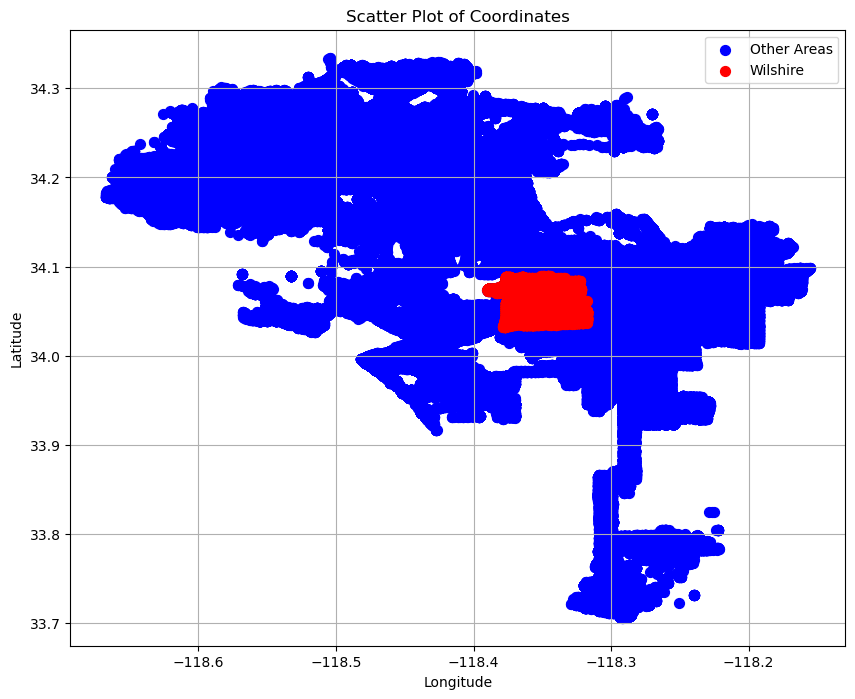

In [39]:
import matplotlib.pyplot as plt

area_7_data = data[data['AREA'] == 7]

area_7_name = area_7_data['AREA NAME'].unique()[0]

plt.figure(figsize=(10, 8))
plt.scatter(data['LON'], data['LAT'], color='blue', marker='o', s=50, label='Other Areas')

plt.scatter(area_7_data['LON'], area_7_data['LAT'], color='red', marker='o', s=50, label=f'{area_7_name}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Coordinates')
plt.grid(True)
plt.legend()
plt.show()


In [41]:
import pandas as pd

selected_columns = ['LAT', 'LON', 'Hour', 'Vict Sex Encoded', 'Vict Descent Encoded', 'Crm Cd 1', 'DATE OCC Day of Week Encoded']
selected_data = data[selected_columns].head(10)

In [42]:
predicted_crime_counts = rf_classifier.predict(selected_data)

print("Predicted crime counts:", predicted_crime_counts)

Predicted crime counts: [ 7  1  3  9  6 18  1  3 13 19]


In [58]:
label_encoder = LabelEncoder()

for column in ['LOCATION']:
    encoded_column = column + ' Encoded'
    data[encoded_column] = label_encoder.fit_transform(data[column])

In [80]:
import pandas as pd

sampled_data =data.sample(n=100000, random_state=42)


In [81]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Mocodes,...,Hour,Time of Day,Reporting Lag,Reporting Lag Interval,On Holidays,Season Encoded,Time of Day Encoded,On Holidays Encoded,DATE OCC Day of Week Encoded,LOCATION Encoded
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,VEHICLE - STOLEN,['21:30'],...,21,Night,0,0-1 days,False,1,2,0,3,23578
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,BURGLARY FROM VEHICLE,"['18:22', '14:02', '03:44']",...,18,Night,1,2-7 days,False,3,2,0,2,1829
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,BIKE - STOLEN,"['03:44', '12:51']",...,17,Afternoon,7,8-30 days,False,0,0,0,6,14815
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),"['03:25', '15:01']",...,20,Night,1156,More than 90 days,False,1,2,0,5,15004
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,THEFT OF IDENTITY,"['18:22', '15:01', '09:30', '20:04']",...,12,Afternoon,731,More than 90 days,False,2,0,0,1,23420


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916993 entries, 0 to 916992
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   DR_NO                         916993 non-null  int64         
 1   Date Rptd                     916993 non-null  datetime64[ns]
 2   DATE OCC                      916993 non-null  datetime64[ns]
 3   TIME OCC                      916993 non-null  object        
 4   AREA                          916993 non-null  int64         
 5   AREA NAME                     916993 non-null  object        
 6   Rpt Dist No                   916993 non-null  int64         
 7   Part 1-2                      916993 non-null  int64         
 8   Crm Cd Desc                   916993 non-null  object        
 9   Mocodes                       916993 non-null  object        
 10  Vict Age                      916993 non-null  float64       
 11  Vict Sex     

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['Hour','Vict Sex Encoded','Vict Descent Encoded','Crm Cd 1','DATE OCC Day of Week Encoded',
            'Vict Age','Time of Day Encoded','Status Desc Encoded','Weapon Used Category Encoded',
            'On Holidays Encoded','Time of Day Encoded']  
X =sampled_data[features]

y =sampled_data['AREA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.09575
Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.13      0.12      1303
           2       0.06      0.06      0.06       921
           3       0.16      0.18      0.17      1142
           4       0.08      0.07      0.07       729
           5       0.06      0.05      0.06       822
           6       0.10      0.09      0.09      1064
           7       0.06      0.06      0.06       977
           8       0.11      0.11      0.11       993
           9       0.07      0.06      0.07       902
          10       0.07      0.07      0.07       874
          11       0.05      0.05      0.05       819
          12       0.12      0.15      0.14      1230
          13       0.09      0.08      0.08       996
          14       0.11      0.12      0.12      1181
          15       0.11      0.11      0.11      1005
          16       0.04      0.04      0.04       666
          17       0.07      0.05      0

In [53]:
import pandas as pd

selected_columns =  ['Hour','Vict Sex Encoded','Vict Descent Encoded','Crm Cd 1','DATE OCC Day of Week Encoded','Vict Age','Time of Day Encoded','Season Encoded']  
selected_data =sampled_data[selected_columns].head(10)

In [54]:
predicted_crime_counts = rf_classifier.predict(selected_data)

print("Predicted crime counts:", predicted_crime_counts)

Predicted crime counts: [11 11  1  1 15 10 14  6  8 21]


In [74]:
count_of_values = data['Premis Cd'].value_counts()
print(count_of_values)

Premis Cd
101.0    233200
501.0    153953
502.0    111422
108.0     63601
203.0     43818
          ...  
746.0         2
889.0         2
240.0         2
715.0         2
137.0         1
Name: count, Length: 307, dtype: int64
